In [1]:
#Importing the Libraries

import numpy as np
import pandas as pd
import random
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [3]:
pid = pd.read_csv('diabetes.csv')
pid.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pid.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Dataset Introduction

The data is sourced from the following URL: https://www.kaggle.com/vincentlugat/pima-indians-diabetes-eda-prediction-0-906/data

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable -Outcome. Independent variables include the number of pregnancies the patient has had, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age. 

#### Objective 

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.  In particular, all patients here are females at least 21 years old (minimum age in the dataset).

#### Overview of the data

The datasets consists of several medical predictor variables and one target variable, Outcome. Columns are following :

Pregnancies : Number of pregnancies has had

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)²)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age in years

Outcome: Class variable (0 or 1) 268 of 768 are (1 - Diabetic), the others are (0 - Non-Diabetic)

### Summary of the Dataset

In [5]:
pid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset consists of 768 rows and 9 columns

### Descriptive Statistics

In [6]:
pd.set_option('precision', 2)
pid.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [7]:
pid['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
(pid.Outcome == 0).describe()

count      768
unique       2
top       True
freq       500
Name: Outcome, dtype: object

### Histogram

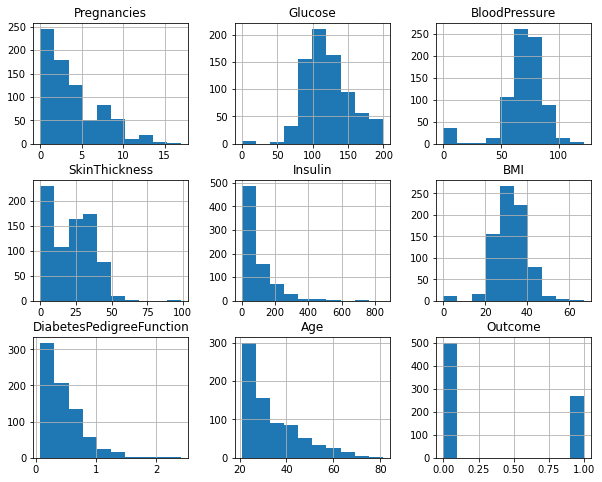

In [9]:
pid.hist(figsize=(10,8))
plt.show()

Histograms also emphasize the existence of outliers and also can see the zero values in some categories. 

### Data Wrangling
#### Checking out for Missing/Null values

In [10]:
pid.isnull().sum()
pid.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

It shows that there are no null values (missing values) in the dataset. But, some variables cannot have 0 in the dataset such as:   
###### Glucose : 
Even after fasting glucose levels would not be as low as 0. Therefore zero is an invalid reading.    
###### BloodPressure : 
We can see 0 values for Blood Pressure, as the Blood Pressure cannot be 0 for anyone, the values are missing here.  
###### SkinThickness : 
For normal people, skin fold thickness can’t be less than 10 mm.    
###### Insulin: 
It cannot be 0, but can see many zero entries in the dataset for this column.   
###### BMI: 
It should not be 0 to anyone. 

#### It seems very likely that zero values encode missing data. We replace 0 by NaN values to count the missing values.

In [11]:
#Replace 0 to NaN
pid_new = pid[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = pid[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
pid_new

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,NaN,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,NaN,NaN,30.1


In [12]:
pid_new.isnull().sum() #count of missing values (Nan in the dataset)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

#### Replacing the 0 values with the median, as in case of outliers median is more robust than mean.

In [13]:
# Calculating the median value for BMI

median_bmi = pid['BMI'].median()

# Substitute it in the BMI column of the dataset

pid['BMI'].fillna(median_bmi,inplace=True)

In [14]:
#substiting the Glucose,BloodPressure,Insulin and SkinThickness columns with the median values

pid['Glucose'].fillna(pid['Glucose'].median(),inplace=True)
pid['BloodPressure'].fillna(pid['BloodPressure'].median(),inplace=True)
pid['SkinThickness'].fillna(pid['SkinThickness'].median(),inplace=True)
pid['Insulin'].fillna(pid['Insulin'].median(),inplace=True)

In [15]:
pid

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.63,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.35,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.67,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.17,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.17,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.34,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.24,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.35,47,1


In [16]:
pid.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,121.66,72.39,29.11,140.67,32.46,0.47,33.24,0.35
std,3.37,30.44,12.10,8.79,86.38,6.88,0.33,11.76,0.48
min,0.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.75,64.00,25.00,121.50,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,29.00,125.00,32.30,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


### Outliers  detection
Doing the further analysis on the columns with box plots

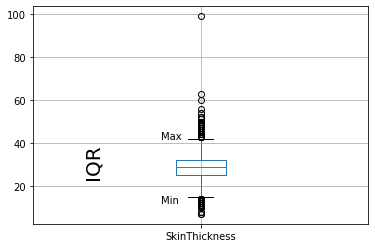

In [17]:
# Creating boxplot for column="SkinThickness"
pid.boxplot(column = 'SkinThickness')

plt.text(x=0.88, y=12, s="Min")
plt.text(x=0.88, y=42, s="Max")
plt.text(x=0.65, y=25, s="IQR", rotation = 90,size = 20)

plt.show()

#### Box Plots of the given categories

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

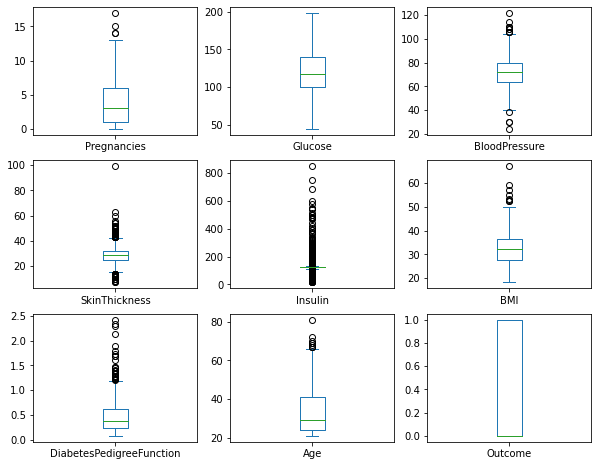

In [18]:
pid.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

#### Dealing with the outliers

##### SkinThickness

In [19]:
st = pid['SkinThickness']

print('Count  :',len(st))
print('min_st :',min(st))
print('max_st :',max(st))

print('q1 quantile of Data : ', np.quantile(st, .25)) 
print('q2 quantile of Data : ', np.quantile(st, .50)) 
print('q3 quantile of Data : ', np.quantile(st, .75))  

iqr = (np.quantile(st, .75) - np.quantile(st, .25))
print('iqr :',iqr)
print('q1-(1.5*iqr) :',np.quantile(st, .25)-(1.5*iqr))
print('q3+(1.5*iqr) :',np .quantile(st, .75)+(1.5*iqr))

Count  : 768
min_st : 7.0
max_st : 99.0
q1 quantile of Data :  25.0
q2 quantile of Data :  29.0
q3 quantile of Data :  32.0
iqr : 7.0
q1-(1.5*iqr) : 14.5
q3+(1.5*iqr) : 42.5


In [20]:
pid_st = pid[pid['SkinThickness']>42.5] #checking for outliers
print("dimension of data: {}".format(pid_st.shape))

dimension of data: (48, 9)


There are 48 rows of data having outliers out of 768 rows of data which is 6% of the data. As this not a large dataset, not removing the rows as can be useful for further analysis.

##### Insulin

In [21]:
Ins = pid['Insulin']

print('Count  :',len(st))
print('min_st :',min(st))
print('max_st :',max(st))

print('q1 quantile of Data : ', np.quantile(Ins, .25)) 
print('q2 quantile of Data : ', np.quantile(Ins, .50)) 
print('q3 quantile of Data : ', np.quantile(Ins, .75))  

iqr = (np.quantile(Ins, .75) - np.quantile(Ins, .25))
print('iqr :',iqr)
print('q1-(1.5*iqr) :',np.quantile(Ins, .25)-(1.5*iqr))
print('q3+(1.5*iqr) :',np.quantile(Ins, .75)+(1.5*iqr))

Count  : 768
min_st : 7.0
max_st : 99.0
q1 quantile of Data :  121.5
q2 quantile of Data :  125.0
q3 quantile of Data :  127.25
iqr : 5.75
q1-(1.5*iqr) : 112.875
q3+(1.5*iqr) : 135.875


In [22]:
pid_Ins = pid[pid['Insulin']>135.875] #checking for outliers
print("dimension of data: {}".format(pid_Ins.shape))

dimension of data: (173, 9)


There are 173 rows of data having outliers out of 768 rows which is 23% of the data. As 25% data is huge data we cannot remove them as it can be useful for further analysis.

##### BMI

In [23]:
bmi = pid['BMI']

print('Count  :',len(bmi))
print('min_st :',min(bmi))
print('max_st :',max(bmi))

q1  = np.percentile(bmi, 25)
q2  = np.percentile(bmi, 50)
q3  = np.percentile(bmi, 75)
iqr = q3 - q1

print('iqr :',iqr)
print('q1-(1.5*iqr) :',q1-(1.5*iqr))
print('q3+(1.5*iqr) :',q3+(1.5*iqr))

Count  : 768
min_st : 18.2
max_st : 67.1
iqr : 9.100000000000001
q1-(1.5*iqr) : 13.849999999999998
q3+(1.5*iqr) : 50.25


In [24]:
pid_bmi = pid[pid['BMI']>50.25] #checking for outliers
print("dimension of data: {}".format(pid_bmi.shape))

dimension of data: (8, 9)


There are 8 rows of data having outliers out of 768 rows which is 1% of the data. 

##### DiabetesPedigreeFunction

In [25]:
dpf = pid['DiabetesPedigreeFunction']

print('Count  :',len(dpf))
print('min_st :',min(dpf))
print('max_st :',max(dpf))

q1  = np.percentile(dpf, 25)
q2  = np.percentile(dpf, 50)
q3  = np.percentile(dpf, 75)
iqr = q3 - q1

print('iqr :',iqr)
print('q1-(1.5*iqr) :',q1-(1.5*iqr))
print('q3+(1.5*iqr) :',q3+(1.5*iqr))

Count  : 768
min_st : 0.078
max_st : 2.42
iqr : 0.38249999999999995
q1-(1.5*iqr) : -0.32999999999999996
q3+(1.5*iqr) : 1.2


In [26]:
pid_dpf = pid[pid['DiabetesPedigreeFunction']>1.2] #checking for outliers
print("dimension of data: {}".format(pid_dpf.shape))

dimension of data: (29, 9)


There are 29 rows of data having outliers out of 768 rows which is 3% of the data.

##### BloodPressure

In [27]:
bp = pid['BloodPressure']

print('Count  :',len(bp))
print('min_st :',min(bp))
print('max_st :',max(bp))

q1  = np.percentile(bp, 25)
q2  = np.percentile(bp, 50)
q3  = np.percentile(bp, 75)
iqr = q3 - q1

print('iqr :',iqr)
print('q1-(1.5*iqr) :',q1-(1.5*iqr))
print('q3+(1.5*iqr) :',q3+(1.5*iqr))

Count  : 768
min_st : 24.0
max_st : 122.0
iqr : 16.0
q1-(1.5*iqr) : 40.0
q3+(1.5*iqr) : 104.0


In [28]:
pid_bp = pid[pid['BloodPressure']>104.0] #checking for outliers
print("dimension of data: {}".format(pid_bp.shape))

dimension of data: (10, 9)


There are 10 rows of data having outliers out of 768 rows which is 1.3% of the data

##### Pregnancies

In [29]:
preg = pid['Pregnancies']

print('Count  :',len(preg))
print('min_st :',min(preg))
print('max_st :',max(preg))

q1  = np.percentile(preg, 25)
q2  = np.percentile(preg, 50)
q3  = np.percentile(preg, 75)
iqr = q3 - q1

print('iqr :',iqr)
print('q1-(1.5*iqr) :',q1-(1.5*iqr))
print('q3+(1.5*iqr) :',q3+(1.5*iqr))

Count  : 768
min_st : 0
max_st : 17
iqr : 5.0
q1-(1.5*iqr) : -6.5
q3+(1.5*iqr) : 13.5


In [30]:
pid_preg = pid[pid['Pregnancies']>13.5] #checking for outliers
print("dimension of data: {}".format(pid_preg.shape))

dimension of data: (4, 9)


There are 4 rows of data having outliers out of 768 rows which is 0.5% of the data. Which is less than 1% data, the outliers of this data will hence be removed.

In [31]:
pid = pid[pid['Pregnancies']<=13.5]

##### Age

In [32]:
age = pid['Age']

print('Count  :',len(age))
print('min_st :',min(age))
print('max_st :',max(age))

q1  = np.percentile(age, 25)
q2  = np.percentile(age, 50)
q3  = np.percentile(age, 75)
iqr = q3 - q1

print('iqr :',iqr)
print('q1-(1.5*iqr) :',q1-(1.5*iqr))
print('q3+(1.5*iqr) :',q3+(1.5*iqr))

Count  : 764
min_st : 21
max_st : 81
iqr : 16.25
q1-(1.5*iqr) : -0.375
q3+(1.5*iqr) : 64.625


In [33]:
pid_age = pid[pid['Age']>66.5] #checking for outliers
print("dimension of data: {}".format(pid_age.shape))

dimension of data: (9, 9)


There are 9 rows of data having outliers out of 768 rows which is 1% of the data.

### Age Descriptive Statistics

In [34]:
import math

age_count = len(pid.Age)
min_age = min(pid.Age)
max_age = max(pid.Age)

print(f'count of all ages is {age_count}')
print(f'minimum age given in the dataset is {min_age}')
print(f'maximum age given in the dataset is {max_age}')

count of all ages is 764
minimum age given in the dataset is 21
maximum age given in the dataset is 81


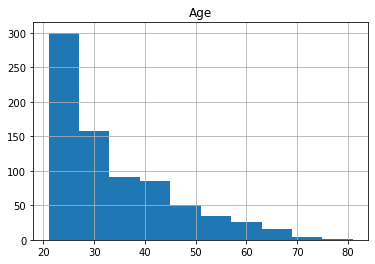

In [35]:
histogram = pid.hist('Age')

By looking at the histogram of Age column, can see the data is rightly skewed.

#### Age mean, median, variance, and standard deviation

In [36]:
import statistics as stat

print(f'stat.mean      = {stat.mean(pid.Age):.2f}')
print(f'stat.median    = {stat.median(pid.Age):.2f}')
print(f'stat.pvariance = {stat.pvariance(pid.Age):.2f}')
print(f'stat.pstdev    = {stat.pstdev(pid.Age):.2f}')

stat.mean      = 33.19
stat.median    = 29.00
stat.pvariance = 138.23
stat.pstdev    = 11.76


In [37]:
print(f'stat.mode      = {stat.mode(pid.Age):.2f}')

stat.mode      = 22.00


#### Computing from definitions

In [38]:
ages_count = len(pid.Age)
print('Count of the age = ',ages_count)

Count of the age =  764


In [39]:
mean_age = sum(pid.Age)/ages_count
print(f'mean of the age = {mean_age:.2f}')

mean of the age = 33.19


In [40]:
sorted_ages = sorted(pid.Age)

In [41]:
mid = ages_count//2

if ages_count%2 == 1:
    median_age = sorted_ages[mid]
else:
    median_age = (sorted_ages[mid] + sorted_ages[mid - 1])/2
    
print(f'median of ages = {median_age:.2f}')

median of ages = 29.00


In [42]:
sum_of_squares = 0

for age in (pid.Age):
    sum_of_squares += (age - mean_age)**2
    
variance = sum_of_squares/ages_count
stdev    = math.sqrt(variance)

print(f'sum sqrs of ages = {sum_of_squares:.2f}')
print(f'variance of ages = {variance:.2f}')
print(f'std dev of ages  = {stdev:.2f}')

sum sqrs of ages = 105606.23
variance of ages = 138.23
std dev of ages  = 11.76


### Exploratory Data Analysis

In [43]:
pid.groupby('Outcome').count() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,264,264,264,264,264,264,264,264


The above data shows that the data is unbalanced. The number of non-diabetic (outcome = 0) is 500 the number of diabetic (outcome = 1) is 268. For this Oversampling with SMOTE (Synthetic Minority Over-sampling Technique) can be used for further analysis.

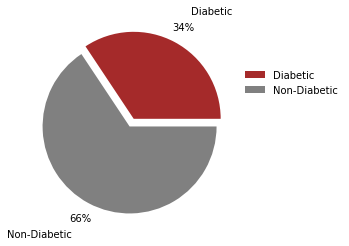

In [44]:
fig, ax = plt.subplots()

labels = ['Diabetic', 
         'Non-Diabetic']
colors = ('brown', 'grey') 
percentages = [34.00, 65.00]
explode=(0.1,0)

ax.pie(percentages, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)

ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

### Heat Map

<AxesSubplot:>

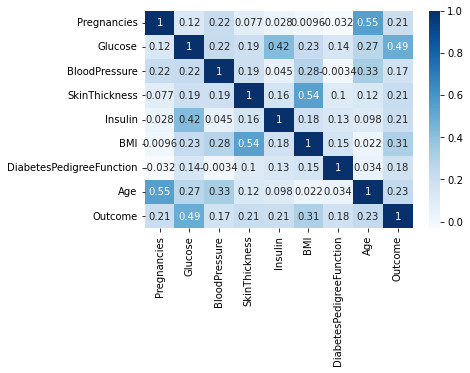

In [45]:
corr = pid[pid.columns].corr()
sns.heatmap(corr, annot = True,cmap='Blues')

From the above heat map, can see we can say that DiabetesPedegreeFunction, BloodPressure, Skin Thickness and Insulin have very less positive relation with the Outcome. We can ignore those for the further analysis.   

Some of the varibles like Glucose,BMI,Age can see little correlation with the outcome. Doing the analysis with those variables.

Also can see the variables- Pregnancies and age having 0.55 of correlation with each other, and BMI and SkinThickness as well.

In [46]:
pid.groupby(['Outcome'])[['Glucose', 'BMI','Age']].agg(['mean','median'])

Glucose           BMI           Age       
           mean median   mean median   mean median
Outcome                                           
0        110.68  107.5  30.89   30.4  31.19   27.0
1        142.11  140.0  35.36   34.2  36.97   36.0

<AxesSubplot:xlabel='Age', ylabel='Count'>

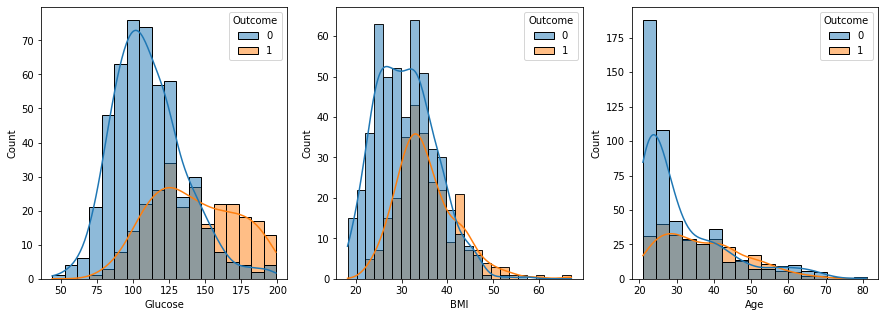

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=pid, x='Glucose', hue='Outcome', kde=True, ax=axs[0])
sns.histplot(data=pid, x='BMI', hue='Outcome', kde=True, ax=axs[1])
sns.histplot(data=pid, x='Age', hue='Outcome', kde=True, ax=axs[2])

### Analysis of Age with respective outcome

In [48]:
a=pd.Series([])
for i in pid.Age:
    if(pid.loc[i:i,]['Age']<=24).bool():
        a=a.append(pd.Series(['21-24']))
    elif(pid.loc[i:i,]['Age']<=30).bool():
        a=a.append(pd.Series(['25-30']))
    elif(pid.loc[i:i,]['Age']<=40).bool():
        a=a.append(pd.Series(['31-40']))
    elif(pid.loc[i:i,]['Age']<=55).bool():
        a=a.append(pd.Series(['41-55']))
    else:
        a=a.append(pd.Series(['>55']))
a.reset_index(drop=True,inplace=True)
pid['Age']=a
pid.head()

#Find the number of diabetic person in each age group

data1=pid[pid['Outcome']==1].groupby('Age')[['Outcome']].count()
data1
data1.head()

,Outcome
Age,
21-24,31
25-30,58
31-40,32
41-55,113
>55,29


In [49]:
data2=pid.groupby('Age')[['Outcome']].count()
data1['Diabetic %']=(data1['Outcome']/data2['Outcome'])*100
data1

,Outcome,Diabetic %
Age,,
21-24,31,37.80
25-30,58,37.91
31-40,32,29.63
41-55,113,32.85
>55,29,39.73


<AxesSubplot:xlabel='Age', ylabel='Diabetic %'>

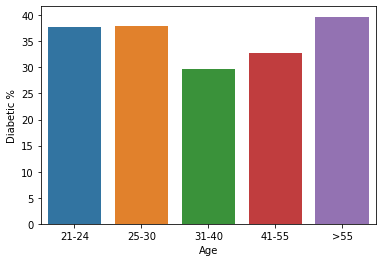

In [50]:
sns.barplot(data1.index,data1['Diabetic %'])

#### Observations:   
1. From the above histplot can see the age column is rightly skewed, we divided those in to age groups and calculated the percentages of the diabetic patients.   
2. From the above bar graph can see patients in the age groups of 21-30 and more than 55 are diabetic than the othe age groups.   
3. Most of the patients in this age group are young women or old women. In young women, as in some cases they can also get diabetics during pregnancy.   
4. Also older women are more prone to get diabetics.

### Analysis of Glucose and BMI with respective outcome

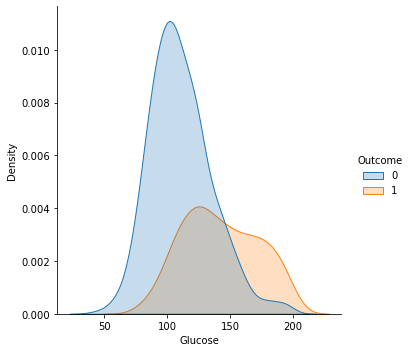

In [51]:
sns.displot(pid, x='Glucose', hue='Outcome', kind="kde", fill=True)

From the plots, can determine women having high Glucose levels tend to have Diabetes

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

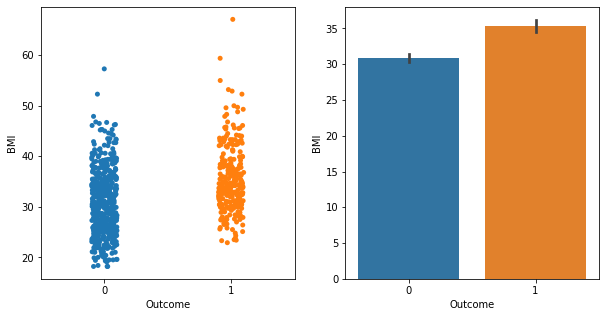

In [52]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))

sns.stripplot(x='Outcome', y='BMI', data=pid,ax=axes[0])
sns.barplot(pid['Outcome'], pid['BMI'],ax=axes[1])

Also women with high BMI are prone to have Diabetes

### Analysis of Pregnancy with respective Outcome

In [53]:
pd.crosstab(pid['Pregnancies'],pid['Outcome'])

Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


In [54]:
pid.groupby(['Outcome'])['Pregnancies'].agg(['mean','median'])

,mean,median
Outcome,,
0,3.30,2.0
1,4.71,4.0


In [55]:
# Create an array with the colors you want to use
colors = ["#FF0B04", "#4374B3"]
# Set your custom color palette
sns.set_palette("muted")

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

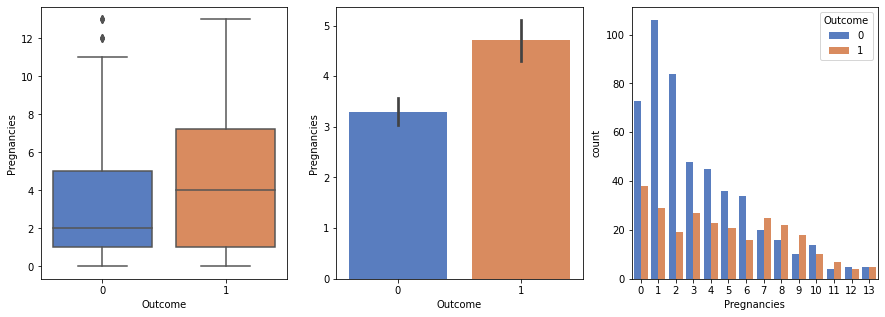

In [56]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))

sns.boxplot(x='Outcome', y='Pregnancies', data=pid,ax=axes[0])
sns.barplot(pid['Outcome'], pid['Pregnancies'],ax=axes[1])
sns.countplot(x='Pregnancies',hue='Outcome',data=pid,ax=axes[2])

From the above charts, can see pregnant women more prone to get the Diabetes. Some studies shows some pregnant women will get diabetes but will go after their pregnancy. As the Diabetes during Pregnancy may not last long but there are chances of getting back when they become old.

### Analysis of Pregnancies and Age

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

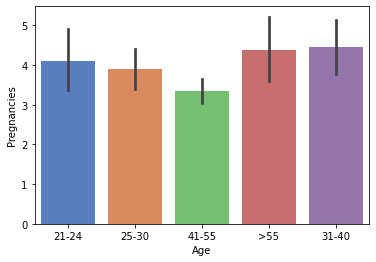

In [57]:
sns.barplot(pid['Age'], pid['Pregnancies'])

From the above graph, we can see not much difference between these variables, cannot see any convincing relationshop but if there are more data points, there may be a possibility of determining some relationship between these variables.

### Analysis of BMI and SkinThickness

<AxesSubplot:xlabel='BMI', ylabel='SkinThickness'>

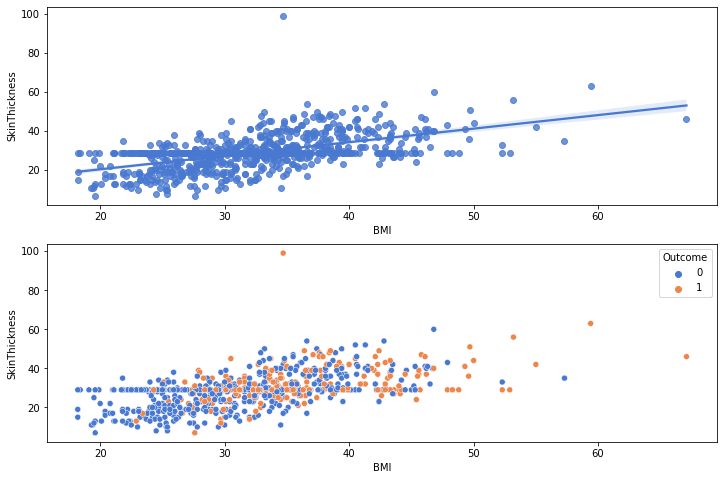

In [58]:
fig, axes = plt.subplots(2,1, figsize=(12, 8))
sns.regplot(data=pid, x='BMI', y='SkinThickness',ax=axes[0])
sns.scatterplot(data=pid,x='BMI',y='SkinThickness',hue='Outcome',ax=axes[1])

Scatter plots are used in terms of determining the relationships between the variables.  
From the above plots, based on the trend line can see little correlation between the variables SkinThickness and BMI but the dataset being small, if there are more number of datapoints i.e., if it is a large dataset then we can determine the relationship between these variables more accurately.  

### Overall Observations:

1. The dataset have nine columns(variables/attributes) in which there are eight independent variables (Pregnancies,Glucose,Blood Pressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age) and one dependent variable (Outcome).

2. In the Dataset the data is unbalanced. The number of non-diabetic (outcome = 0) is 500 the number of diabetic (outcome = 1) is 268. Some the oversampling techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be used for further analysis.  

3. Some of the variables do not contain any null values (missing values). However, this can not be true. As Insulin,SkinThickness,BloodPressure,BMI,Glucose have zero values. 

4. The missing values '0' is replaced by the median of the variables for the analysis. As there are outliers in the data median is more robust than mean. 

5. Some variables like BloodPressure,SkinThickness,Insulin,BMI have outliers, hence there are not many datapoints in the dataset (not being a large dataset), the data is not removed from these. However for Pregnancies there are outliers below 1% only those rows are removed from the dataset. 

6. In the analysis part, Some of the variables like Glucose,BMI,Age can see little correlation with the outcome. And also Pregnancies and age, BMI and Skinthickness also show some correlation by looking at the heat map.

7. After plotting on the charts, there is no convincing relationship can be seen between Pregnancies and Age, BMI and skinthickness. However if it is a large dataset then can determine the relationship between these variables.

8. pregnant women more prone to get the Diabetes. Some studies shows some pregnant women will get diabetes but will go after their pregnancy. As the Diabetes during Pregnancy may not last long but there are chances of getting back when they become old.

9. From the plots, can determine women having high Glucose levels and BMI levels tend to have Diabetes.